In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
train_data = pd.read_csv('./used_car_train_20200313.csv',sep=' ')
# print(train_data.head())
test_data = pd.read_csv('./used_car_testB_20200421.csv',sep=' ')
# print(test_data.head())

# print(test_data.columns)
print(test_data.notRepairedDamage.value_counts())
test_data['notRepairedDamage'].replace('-','0.0',inplace=True)#元数据中有非数值类型值，需要进行替换处理
test_data['notRepairedDamage'] = test_data.notRepairedDamage.astype('float64')#将数值类型改成float64，方便计算
train_data['notRepairedDamage'].replace('-','0.0',inplace=True)
train_data['notRepairedDamage'] = train_data.notRepairedDamage.astype('float64')

0.0    37224
-       8069
1.0     4707
Name: notRepairedDamage, dtype: int64


In [2]:
import missingno as msno
msno.matrix(train_data,labels=True)
#msno.bar(train_data)

In D:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 a

<AxesSubplot:>

<AxesSubplot:>

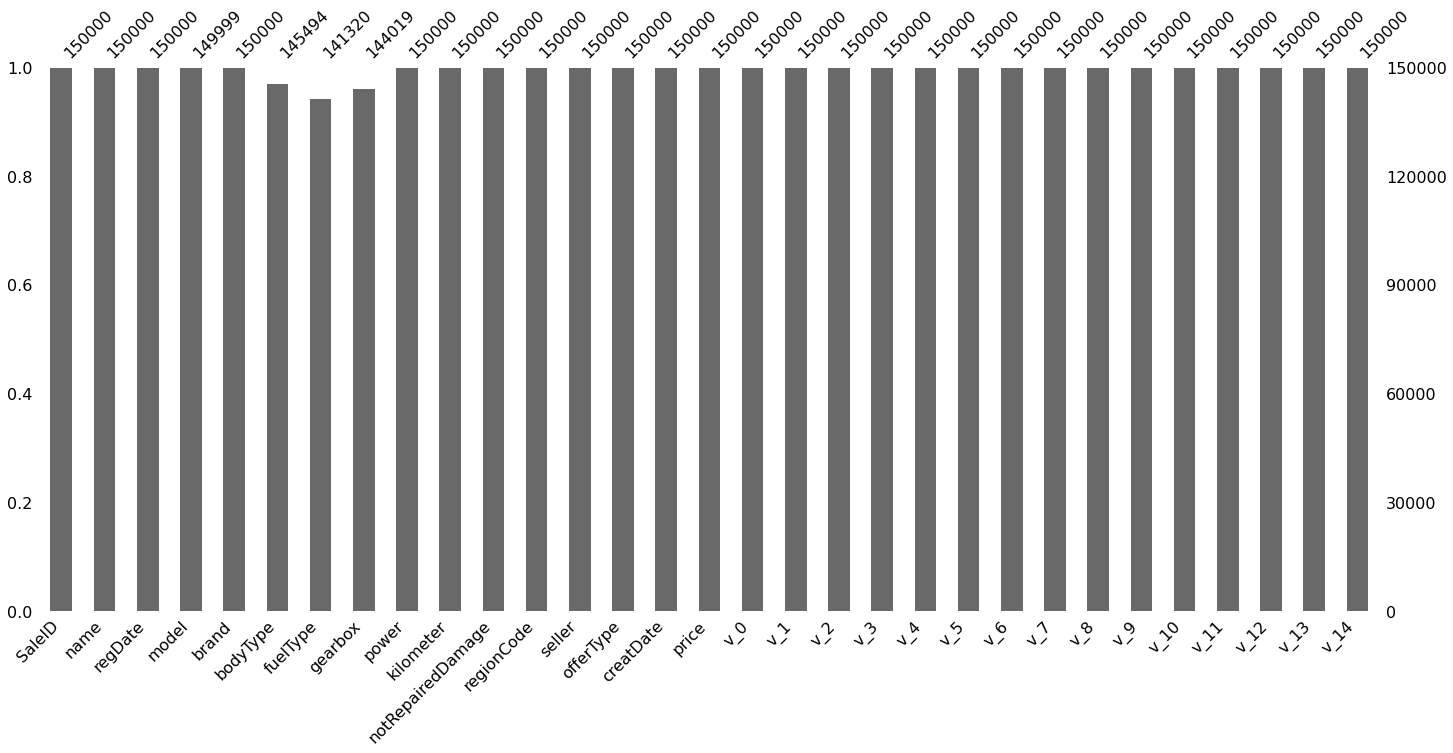

In [3]:
msno.bar(train_data)

<AxesSubplot:>

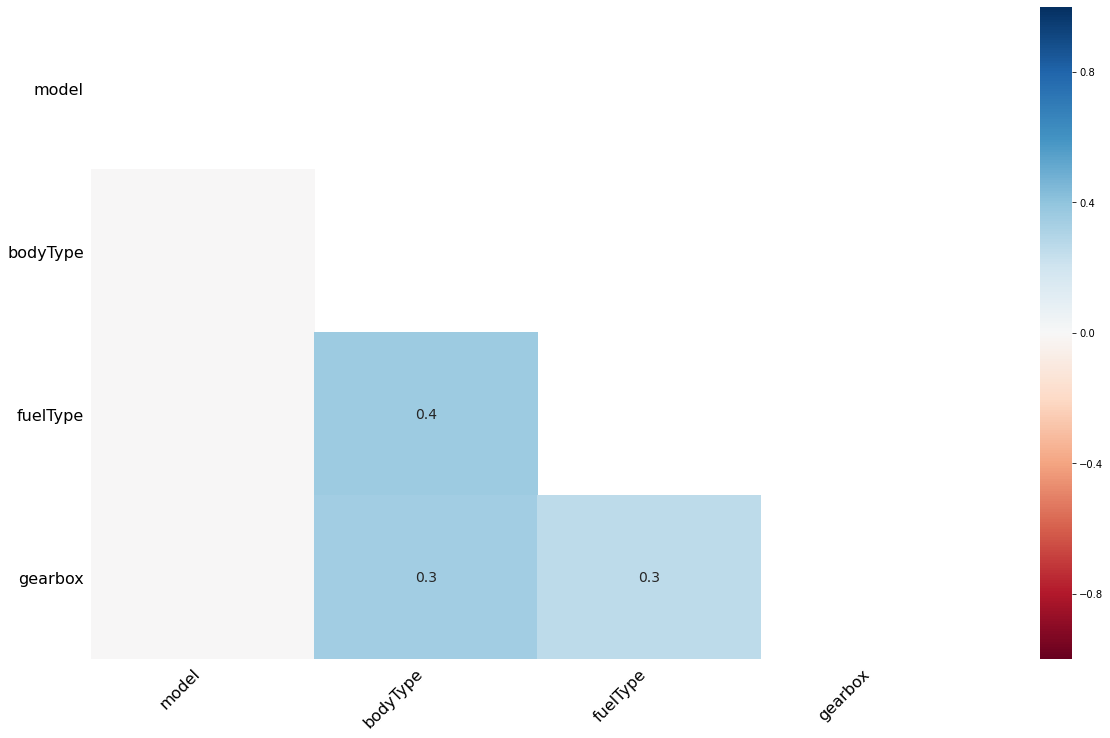

In [4]:
msno.heatmap(train_data)

In [5]:
print(train_data.columns)
print(len(train_data.columns))

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')
31


In [6]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  float64
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [7]:
print(train_data.shape)
print(train_data.head())

(150000, 31)
   SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
0       0     736  20040402   30.0      6       1.0       0.0      0.0     60   
1       1    2262  20030301   40.0      1       2.0       0.0      0.0      0   
2       2   14874  20040403  115.0     15       1.0       0.0      0.0    163   
3       3   71865  19960908  109.0     10       0.0       0.0      1.0    193   
4       4  111080  20120103  110.0      5       1.0       0.0      0.0     68   

   kilometer  notRepairedDamage  regionCode  seller  offerType  creatDate  \
0       12.5                0.0        1046       0          0   20160404   
1       15.0                0.0        4366       0          0   20160309   
2       12.5                0.0        2806       0          0   20160402   
3       15.0                0.0         434       0          0   20160312   
4        5.0                0.0        6977       0          0   20160313   

   price        v_0       v_1       v

In [8]:
print(train_data.tail())

        SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
149995  149995  163978  20000607  121.0     10       4.0       0.0      1.0   
149996  149996  184535  20091102  116.0     11       0.0       0.0      0.0   
149997  149997  147587  20101003   60.0     11       1.0       1.0      0.0   
149998  149998   45907  20060312   34.0     10       3.0       1.0      0.0   
149999  149999  177672  19990204   19.0     28       6.0       0.0      1.0   

        power  kilometer  notRepairedDamage  regionCode  seller  offerType  \
149995    163       15.0                0.0        4576       0          0   
149996    125       10.0                0.0        2826       0          0   
149997     90        6.0                0.0        3302       0          0   
149998    156       15.0                0.0        1877       0          0   
149999    193       12.5                0.0         235       0          0   

        creatDate  price        v_0       v_1       v_2 

In [9]:
train_data.describe()#std=0的不具有建模意义
train_data.drop(columns=['offerType'],inplace=True,axis=1)
test_data.drop(columns=['offerType'],inplace=True,axis=1)
train_data.columns
test_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [10]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64
SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             2924
gearbox              1968

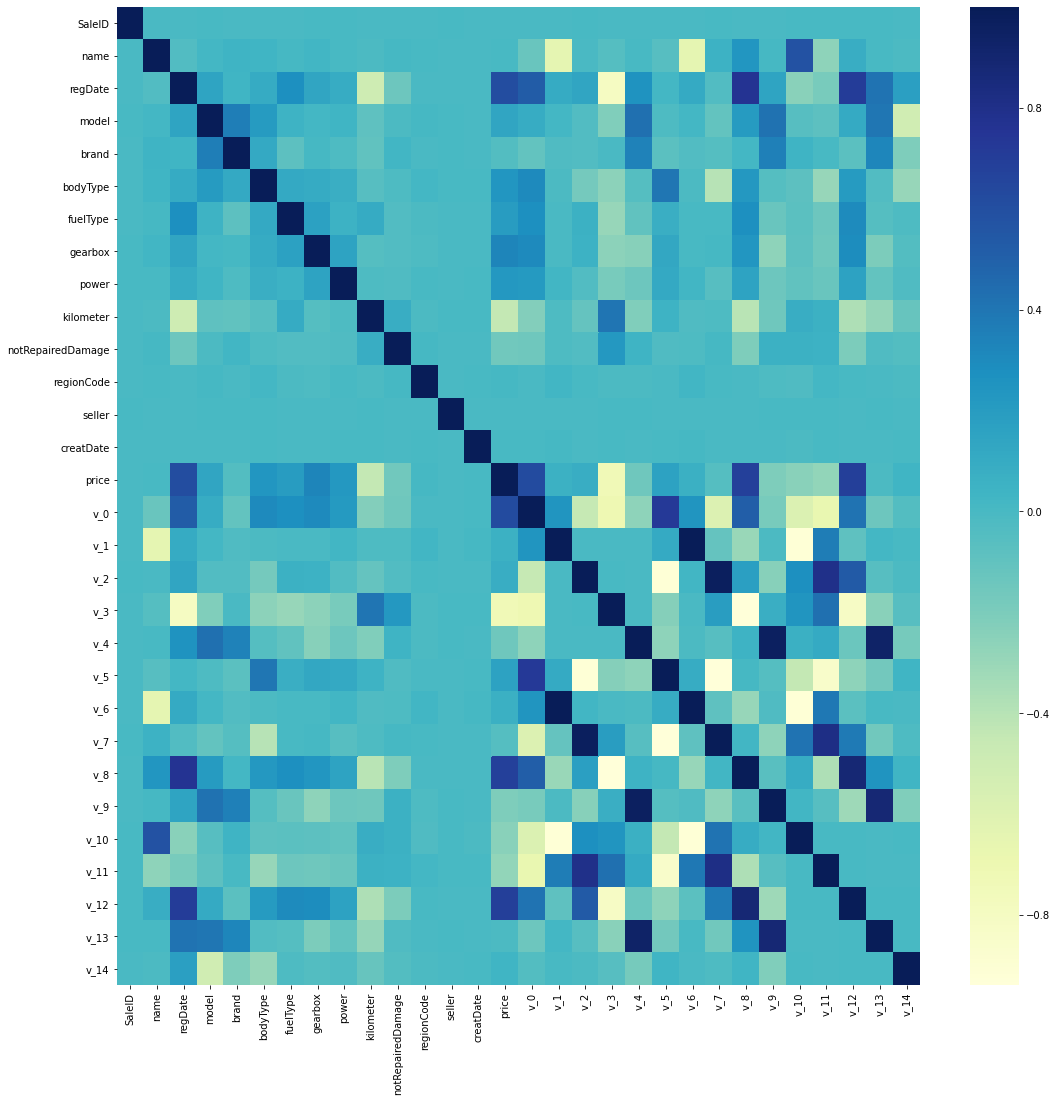

In [11]:
#查看变量相关性
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 18))
corr = train_data.corr() # pandas直接调用corr就能计算特征之间的相关系数
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap='YlGnBu')
plt.show()

In [12]:
#删掉关联性高的字段
train_data.drop(columns=['v_4','v_9','v_1','v_2','v_8','v_7'],inplace=True,axis=1)
test_data.drop(columns=['v_4','v_9','v_1','v_2','v_8','v_7'],inplace=True,axis=1)

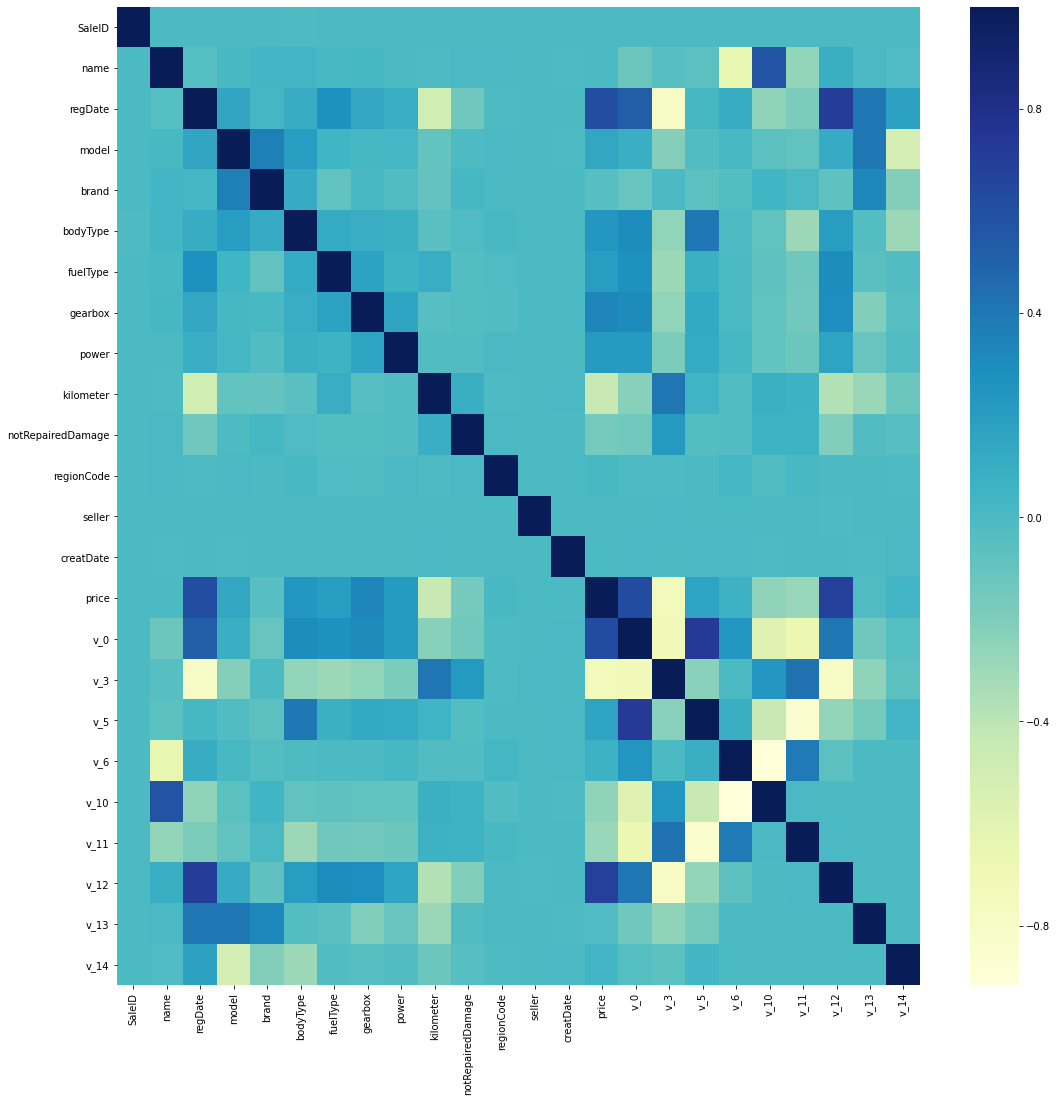

In [13]:
#查看变量相关性
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 18))
corr = train_data.corr() # pandas直接调用corr就能计算特征之间的相关系数
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap='YlGnBu')
plt.show()

In [14]:
print(corr)#在剔除掉关联性强的数据后，没有pearson0.8以上的数据了

                     SaleID      name   regDate     model     brand  bodyType  \
SaleID             1.000000 -0.002299 -0.001373  0.000659 -0.001754 -0.005163   
name              -0.002299  1.000000 -0.037638  0.016080  0.040678  0.034532   
regDate           -0.001373 -0.037638  1.000000  0.148780  0.033199  0.102864   
model              0.000659  0.016080  0.148780  1.000000  0.358765  0.207208   
brand             -0.001754  0.040678  0.033199  0.358765  1.000000  0.114116   
bodyType          -0.005163  0.034532  0.102864  0.207208  0.114116  1.000000   
fuelType          -0.001584  0.014880  0.276227  0.048767 -0.079566  0.118717   
gearbox            0.001153  0.026104  0.142631  0.019314  0.012914  0.099966   
power              0.000873  0.000236  0.097446  0.031245 -0.022391  0.079632   
kilometer         -0.001115 -0.007613 -0.492852 -0.087445 -0.096262 -0.053212   
notRepairedDamage -0.003008  0.011158 -0.136967 -0.010141  0.023074 -0.017969   
regionCode        -0.001078 

In [15]:
#所有字段的缺失值利用中位数补全
test_data = test_data.fillna(test_data.median())
train_data = train_data.fillna(train_data.median())

In [16]:
train_data['power'][train_data['power']>600] = 600  #对于某些字段的不在合理范围内的值进行处理
print(train_data.power.describe())

count    150000.000000
mean        116.860973
std          70.075256
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max         600.000000
Name: power, dtype: float64


D:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
#特征选择
features = train_data.columns.tolist()
features.remove('price')#去掉label字段
features.remove('SaleID')#去掉无关字段

In [18]:
#特征归一化
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(train_data[features].values)#全量特征值
x_test = min_max_scaler.transform(test_data[features].values)

In [19]:
#得到y值
y = train_data.price.values#全量labels
# print(y)

#数据集切分
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [20]:
#搭建模型
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(300,activation='relu',input_shape=[len(features)]),#全连接mlp
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(1)
])


#对模型设置编辑器
model.compile(loss='mean_absolute_error',optimizer='Adam')
#模型训练 全量数据集
model.fit(x,y,batch_size=1024,epochs=200)


Epoch 1/200
147/147 [==============================] - 1s 4ms/step - loss: 4946.6904
Epoch 2/200
147/147 [==============================] - 1s 5ms/step - loss: 3132.3293
Epoch 3/200
147/147 [==============================] - 1s 4ms/step - loss: 1552.6768
Epoch 4/200
147/147 [==============================] - 1s 5ms/step - loss: 1234.4077
Epoch 5/200
147/147 [==============================] - 1s 4ms/step - loss: 1110.4916
Epoch 6/200
147/147 [==============================] - 1s 5ms/step - loss: 1022.2149
Epoch 7/200
147/147 [==============================] - 1s 4ms/step - loss: 952.6667
Epoch 8/200
147/147 [==============================] - 1s 4ms/step - loss: 898.8378
Epoch 9/200
147/147 [==============================] - 1s 5ms/step - loss: 854.9066
Epoch 10/200
147/147 [==============================] - 1s 3ms/step - loss: 820.2071
Epoch 11/200
147/147 [==============================] - 1s 5ms/step - loss: 791.0301
Epoch 12/200
147/147 [==============================] - 1s 4ms/step 

147/147 [==============================] - 1s 4ms/step - loss: 511.9675
Epoch 98/200
147/147 [==============================] - 1s 5ms/step - loss: 511.4365
Epoch 99/200
147/147 [==============================] - 1s 5ms/step - loss: 511.8649
Epoch 100/200
147/147 [==============================] - 1s 4ms/step - loss: 511.4388
Epoch 101/200
147/147 [==============================] - 1s 4ms/step - loss: 509.5950
Epoch 102/200
147/147 [==============================] - 1s 4ms/step - loss: 508.5811
Epoch 103/200
147/147 [==============================] - 1s 5ms/step - loss: 509.1820
Epoch 104/200
147/147 [==============================] - 1s 5ms/step - loss: 507.6774
Epoch 105/200
147/147 [==============================] - 1s 5ms/step - loss: 508.6562
Epoch 106/200
147/147 [==============================] - 1s 5ms/step - loss: 506.9513
Epoch 107/200
147/147 [==============================] - 1s 5ms/step - loss: 508.3748
Epoch 108/200
147/147 [==============================] - 1s 5ms/step -

147/147 [==============================] - 1s 4ms/step - loss: 482.4095
Epoch 193/200
147/147 [==============================] - 1s 4ms/step - loss: 482.2481
Epoch 194/200
147/147 [==============================] - 1s 4ms/step - loss: 481.3654
Epoch 195/200
147/147 [==============================] - 1s 4ms/step - loss: 482.1393
Epoch 196/200
147/147 [==============================] - 1s 4ms/step - loss: 479.7545
Epoch 197/200
147/147 [==============================] - 1s 4ms/step - loss: 480.4997
Epoch 198/200
147/147 [==============================] - 1s 4ms/step - loss: 480.0215
Epoch 199/200
147/147 [==============================] - 1s 4ms/step - loss: 480.9257
Epoch 200/200
147/147 [==============================] - 1s 4ms/step - loss: 479.8623


In [21]:

#模型评估
from sklearn.metrics import mean_absolute_error
print('训练集评估：MAE:',mean_absolute_error(train_y,model.predict(train_x)))

print('验证集评估：MAE:',mean_absolute_error(test_y,model.predict(test_x)))

训练集评估：MAE: 475.23698169031144
验证集评估：MAE: 482.51387730204266


In [22]:
#输出结果 调整结果数据  输出文件 提交天池     最终得分532.7958
predict_y = model.predict(x_test)
result = pd.DataFrame()
result['SaleID'] = test_data['SaleID']
result['price'] = predict_y
result['price'][result.price<11] = 11
result['price'][result.price>99999] = 99999
result.to_csv('./mlp_nn.csv',index=False)

D:\python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [23]:
result['price'][result.price>99999]

Series([], Name: price, dtype: float32)